## Soccer Dataset Exploration

In [2]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data is in the sqlite file/db.

In [3]:
cnx = sqlite3.connect('database.sqlite')

Tables in db are:

Country, Match, Player_Attributes, Team_Attributes, League, Player, Team     

In [4]:
countries_df = pd.read_sql_query("SELECT * FROM Country", cnx)
countries_df

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
leagues_df = pd.read_sql_query("SELECT * FROM League", cnx)
leagues_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [6]:
teams_df = pd.read_sql_query("SELECT * FROM Team", cnx)
teams_df.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [7]:
matches_df = pd.read_sql_query("SELECT * FROM Match", cnx)
matches_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

Display teams in the English Premier League.

In [8]:
query_epl = '''
    select * from team where team_api_id in (select distinct home_team_api_id from Match where country_id = 1729)
'''
epl_teams_df = pd.read_sql_query(query_epl, cnx)
epl_teams_df

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,4234,8191,1796,Burnley,BUR
1,8021,8197,95,Leicester City,LEI
2,7276,8344,1961,Cardiff City,CAR
3,3475,8455,5,Chelsea,CHE
4,3466,8456,10,Manchester City,MCI
5,3476,8462,1790,Portsmouth,POR
6,6504,8466,17,Southampton,SOU
7,3461,8472,106,Sunderland,SUN
8,4996,8483,1926,Blackpool,BLA
9,3464,8528,1917,Wigan Athletic,WIG


In [9]:
ta_df = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)
ta_df.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [10]:
query_big6_teams = '''
SELECT * FROM Team t, Team_Attributes attr
where attr.team_fifa_api_id = t.team_fifa_api_id 
    --and t.team_short_name in ('CHE', 'MCI', 'TOT', 'LIV', 'ARS', 'MUN')
    and t.team_fifa_api_id in (5, 10, 18, 9, 1, 11)
'''
big6_epl_teams_df = pd.read_sql_query(query_big6_teams, cnx)
big6_epl_teams_df

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,3457,10260,11,Manchester United,MUN,807,11,10260,2010-02-22 00:00:00,70,...,65,Normal,Free Form,40,Medium,50,Press,40,Normal,Cover
1,3457,10260,11,Manchester United,MUN,808,11,10260,2011-02-22 00:00:00,65,...,70,Lots,Free Form,45,Medium,45,Press,65,Normal,Cover
2,3457,10260,11,Manchester United,MUN,809,11,10260,2012-02-22 00:00:00,46,...,55,Normal,Organised,40,Medium,50,Press,56,Normal,Cover
3,3457,10260,11,Manchester United,MUN,810,11,10260,2013-09-20 00:00:00,46,...,37,Normal,Organised,49,Medium,49,Press,56,Normal,Cover
4,3457,10260,11,Manchester United,MUN,811,11,10260,2014-09-19 00:00:00,46,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
5,3457,10260,11,Manchester United,MUN,812,11,10260,2015-09-10 00:00:00,38,...,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover
6,3459,9825,1,Arsenal,ARS,71,1,9825,2010-02-22 00:00:00,66,...,35,Normal,Free Form,30,Deep,40,Press,50,Normal,Cover
7,3459,9825,1,Arsenal,ARS,72,1,9825,2011-02-22 00:00:00,75,...,65,Normal,Free Form,50,Medium,40,Press,45,Normal,Cover
8,3459,9825,1,Arsenal,ARS,73,1,9825,2012-02-22 00:00:00,25,...,30,Little,Free Form,57,Medium,57,Press,52,Normal,Cover
9,3459,9825,1,Arsenal,ARS,74,1,9825,2013-09-20 00:00:00,30,...,39,Normal,Free Form,64,Medium,54,Press,52,Normal,Cover


Collect the goals scored, conceded and the points for each team and every season in the EPL
(seasons 2008/2009 through 2015/2016).

In [11]:
query_epl_scores = '''
select s.team_short_name, s.team_long_name, s.season,
    sum(s.scored) as goals_scored, sum(s.conceded) as goals_conceded,
    sum(s.scored) - sum(s.conceded) as goals_difference, sum(points) as points
from
(select t.team_short_name, t.team_long_name, m.season,
    m.home_team_goal as scored, m.away_team_goal as conceded,
    case when m.home_team_goal > m.away_team_goal then 3
         when m.home_team_goal = m.away_team_goal then 1
         else 0
    end as points
from Team t, Match m
where m.home_team_api_id = t.team_api_id
    and m.home_team_api_id in (select distinct home_team_api_id from Match where country_id = 1729)
union all
select t.team_short_name, t.team_long_name, m.season, 
    m.away_team_goal as scored, m.home_team_goal as conceded,
    case when m.home_team_goal > m.away_team_goal then 0
         when m.home_team_goal = m.away_team_goal then 1
         else 3
    end as points
from Team t, Match m
where m.away_team_api_id = t.team_api_id
    and m.away_team_api_id in (select distinct away_team_api_id from Match where country_id = 1729)
) s
group by s.team_short_name, s.team_long_name, s.season
'''
epl_stats_df = pd.read_sql_query(query_epl_scores, cnx)
epl_stats_df

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
0,ARS,Arsenal,2008/2009,68,37,31,72
1,ARS,Arsenal,2009/2010,83,41,42,75
2,ARS,Arsenal,2010/2011,72,43,29,68
3,ARS,Arsenal,2011/2012,74,49,25,70
4,ARS,Arsenal,2012/2013,72,37,35,73
5,ARS,Arsenal,2013/2014,68,41,27,79
6,ARS,Arsenal,2014/2015,71,36,35,75
7,ARS,Arsenal,2015/2016,65,36,29,71
8,AVL,Aston Villa,2008/2009,54,48,6,62
9,AVL,Aston Villa,2009/2010,52,39,13,64


Let's look at the correlations between numeric columns.

In [12]:
epl_stats_df.corr()

,goals_scored,goals_conceded,goals_difference,points
goals_scored,1.000000,-0.605111,0.916571,0.887101
goals_conceded,-0.605111,1.000000,-0.872981,-0.835271
goals_difference,0.916571,-0.872981,1.000000,0.963004
points,0.887101,-0.835271,0.963004,1.000000


Season 2008/2009

Champion: Manchester United - 90 points

Best offense: Liverpool - 77 goals scored

Best defense - tie: Manchester United, Chelsea - 24 goals conceded

Best goal differential: Liverpol - 50

In [13]:
epl_stats_2009_df = epl_stats_df[epl_stats_df.season == '2008/2009']
epl_stats_2009_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
79,MUN,Manchester United,2008/2009,68,24,44,90
62,LIV,Liverpool,2008/2009,77,27,50,86
31,CHE,Chelsea,2008/2009,68,24,44,83
0,ARS,Arsenal,2008/2009,68,37,31,72
42,EVE,Everton,2008/2009,55,37,18,63
8,AVL,Aston Villa,2008/2009,54,48,6,62
50,FUL,Fulham,2008/2009,39,34,5,53
145,WHU,West Ham United,2008/2009,42,45,-3,51
129,TOT,Tottenham Hotspur,2008/2009,45,45,0,51
70,MCI,Manchester City,2008/2009,58,50,8,50


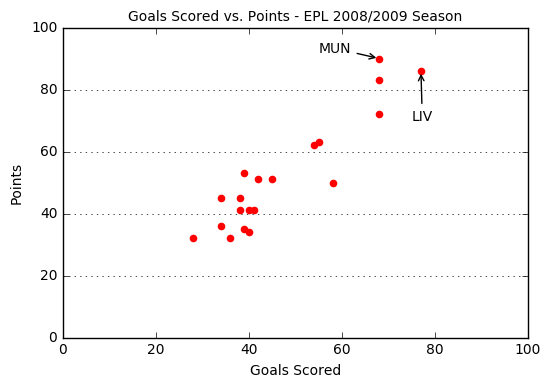

In [14]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Goals Scored vs. Points - EPL 2008/2009 Season',fontsize=10)
axis.set_xlabel('Goals Scored',fontsize=10)
axis.set_ylabel('Points',fontsize=10)
X = epl_stats_2009_df['goals_scored']
Y = epl_stats_2009_df['points']
axis.scatter(X, Y, color='red')
axis.annotate('MUN', xy=(68, 90), xytext=(55, 92), 
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'))
axis.annotate('LIV', xy=(77, 86), xytext=(75, 70), 
            arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3'))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

Season 2009/2010

Champion: Chelsea - 86 points

Best offense: Chelsea - 103 goals scored

Best defense: Manchester United - 28 goals conceded

Best goal differential: Chelsea - 71

In [15]:
epl_stats_2010_df = epl_stats_df[epl_stats_df.season == '2009/2010']
epl_stats_2010_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
32,CHE,Chelsea,2009/2010,103,32,71,86
80,MUN,Manchester United,2009/2010,86,28,58,85
1,ARS,Arsenal,2009/2010,83,41,42,75
130,TOT,Tottenham Hotspur,2009/2010,67,41,26,70
71,MCI,Manchester City,2009/2010,73,45,28,67
9,AVL,Aston Villa,2009/2010,52,39,13,64
63,LIV,Liverpool,2009/2010,61,35,26,63
43,EVE,Everton,2009/2010,60,49,11,61
20,BLB,Blackburn Rovers,2009/2010,41,55,-14,50
16,BIR,Birmingham City,2009/2010,38,47,-9,50


Season 2010/2011

Champion: Manchester United - 80 points

Best offense: Manchester United - 78 goals scored

Best defense - tie: Manchester City, Chelsea - 33 goals conceded

Best goal differential: Manchester United - 41

In [16]:
epl_stats_2011_df = epl_stats_df[epl_stats_df.season == '2010/2011']
epl_stats_2011_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
81,MUN,Manchester United,2010/2011,78,37,41,80
72,MCI,Manchester City,2010/2011,60,33,27,71
33,CHE,Chelsea,2010/2011,69,33,36,71
2,ARS,Arsenal,2010/2011,72,43,29,68
131,TOT,Tottenham Hotspur,2010/2011,55,46,9,62
64,LIV,Liverpool,2010/2011,59,44,15,58
44,EVE,Everton,2010/2011,51,45,6,54
52,FUL,Fulham,2010/2011,49,43,6,49
10,AVL,Aston Villa,2010/2011,48,59,-11,48
118,SUN,Sunderland,2010/2011,45,56,-11,47


Season 2011/2012

Champion - tie: Manchester City, Manchester United - 89 points

Best offense: Manchester City - 93 goals scored

Best defense: Manchester City - 29 goals conceded

Best goal differential: Manchester City - 64

In [17]:
epl_stats_2012_df = epl_stats_df[epl_stats_df.season == '2011/2012']
epl_stats_2012_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
73,MCI,Manchester City,2011/2012,93,29,64,89
82,MUN,Manchester United,2011/2012,89,33,56,89
3,ARS,Arsenal,2011/2012,74,49,25,70
132,TOT,Tottenham Hotspur,2011/2012,66,41,25,69
89,NEW,Newcastle United,2011/2012,56,51,5,65
34,CHE,Chelsea,2011/2012,65,46,19,64
45,EVE,Everton,2011/2012,50,40,10,56
53,FUL,Fulham,2011/2012,48,51,-3,52
65,LIV,Liverpool,2011/2012,47,40,7,52
94,NOR,Norwich City,2011/2012,52,66,-14,47


Season 2012/2013

Champion: Manchester United - 89 points

Best offense: Manchester United - 86 goals scored

Best defense: Manchester City - 34 goals conceded

Best goal differential: Manchester United - 43

In [18]:
epl_stats_2013_df = epl_stats_df[epl_stats_df.season == '2012/2013']
epl_stats_2013_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
83,MUN,Manchester United,2012/2013,86,43,43,89
74,MCI,Manchester City,2012/2013,66,34,32,78
35,CHE,Chelsea,2012/2013,75,39,36,75
4,ARS,Arsenal,2012/2013,72,37,35,73
133,TOT,Tottenham Hotspur,2012/2013,66,46,20,72
46,EVE,Everton,2012/2013,55,40,15,63
66,LIV,Liverpool,2012/2013,71,43,28,61
141,WBA,West Bromwich Albion,2012/2013,53,57,-4,49
148,WHU,West Ham United,2012/2013,45,53,-8,46
125,SWA,Swansea City,2012/2013,47,51,-4,46


Season 2013/2014

Champion: Manchester City - 86 points

Best offense: Manchester City - 102 goals scored

Best defense: Chelsea - 27 goals conceded

Best goal differential: Manchester City - 65

In [19]:
epl_stats_2014_df = epl_stats_df[epl_stats_df.season == '2013/2014']
epl_stats_2014_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
75,MCI,Manchester City,2013/2014,102,37,65,86
67,LIV,Liverpool,2013/2014,101,50,51,84
36,CHE,Chelsea,2013/2014,71,27,44,82
5,ARS,Arsenal,2013/2014,68,41,27,79
47,EVE,Everton,2013/2014,61,39,22,72
134,TOT,Tottenham Hotspur,2013/2014,55,51,4,69
84,MUN,Manchester United,2013/2014,64,43,21,64
105,SOU,Southampton,2013/2014,54,46,8,56
113,STK,Stoke City,2013/2014,45,52,-7,50
91,NEW,Newcastle United,2013/2014,43,59,-16,49


Season 2014/2015

Champion: Chelsea - 87 points

Best offense: Manchester City - 83 goals scored

Best defense: Chelsea - 32 goals conceded

Best goal differential: Manchester City - 45

In [20]:
epl_stats_2015_df = epl_stats_df[epl_stats_df.season == '2014/2015']
epl_stats_2015_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
37,CHE,Chelsea,2014/2015,73,32,41,87
76,MCI,Manchester City,2014/2015,83,38,45,79
6,ARS,Arsenal,2014/2015,71,36,35,75
85,MUN,Manchester United,2014/2015,62,37,25,70
135,TOT,Tottenham Hotspur,2014/2015,58,53,5,64
68,LIV,Liverpool,2014/2015,52,48,4,62
106,SOU,Southampton,2014/2015,54,33,21,60
127,SWA,Swansea City,2014/2015,46,49,-3,56
114,STK,Stoke City,2014/2015,48,45,3,54
40,CRY,Crystal Palace,2014/2015,47,51,-4,48


Season 2015/2016

Champion: Leicester City - 81 points

Best offense: Manchester City - 71 goals scored

Best defense - tie: Tottenham, Manchester United - 35 goals conceded

Best goal differential: Tottenham - 34

In [21]:
epl_stats_2016_df = epl_stats_df[epl_stats_df.season == '2015/2016']
epl_stats_2016_df.sort_values('points', ascending=False)

,team_short_name,team_long_name,season,goals_scored,goals_conceded,goals_difference,points
61,LEI,Leicester City,2015/2016,68,36,32,81
7,ARS,Arsenal,2015/2016,65,36,29,71
136,TOT,Tottenham Hotspur,2015/2016,69,35,34,70
86,MUN,Manchester United,2015/2016,49,35,14,66
77,MCI,Manchester City,2015/2016,71,41,30,66
107,SOU,Southampton,2015/2016,59,41,18,63
151,WHU,West Ham United,2015/2016,65,51,14,62
69,LIV,Liverpool,2015/2016,63,50,13,60
115,STK,Stoke City,2015/2016,41,55,-14,51
38,CHE,Chelsea,2015/2016,59,53,6,50
